<a href="https://colab.research.google.com/github/Kaustuv1234/MTech_image_segmentation/blob/master/display_multispectral_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AOI_10_Dar_Es_Salaam_MS_COG.tif<br>
8 channels<br>
(10532, 11138)<br>
max, min = 10000, 0


---

WV2 (0.46 m and 1.84 m GSD of PAN and MS modes, respectively) is the first commercial VHR satellite providing 8 bands in MS mode. These bands are the four classical bands <br>
B:    450-510 nm<br>
G:    510-580 nm<br>
R:    630-690 nm<br>
NIR1: 760-895 nm<br>
and four additional bands <br>
C:    400-450  nm<br>
Y:    585-625  nm<br>
RE:   705-745  nm<br>
NIR2: 860-1102 nm<br>



In [ ]:
%matplotlib inline

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

dataset = gdal.Open(r'/content/drive/MyDrive/WV2SegMentData/AOI_10_Dar_Es_Salaam_MS_COG.tif')

In [ ]:
no_channels = dataset.RasterCount
OX, OY = 452, 678 # patch origin
H, W = 10000, 10000 # patch size

image = []
# get the channels as np array
for i in tqdm(range(1, no_channels+1), desc='channel_no:', total=no_channels):
    band = np.array(dataset.GetRasterBand(i).ReadAsArray())
    omax, omin = 10000, 0
    nmax, nmin = 255, 0
    bands_scaled = (((band - omin) / (omax - omin)) * (nmax - nmin)) + nmin

    img = bands_scaled[OX:OX+H, OY:OY+W].astype(np.uint8)
    image.append(img)

channel_no:: 100%|██████████| 8/8 [03:17<00:00, 24.63s/it]


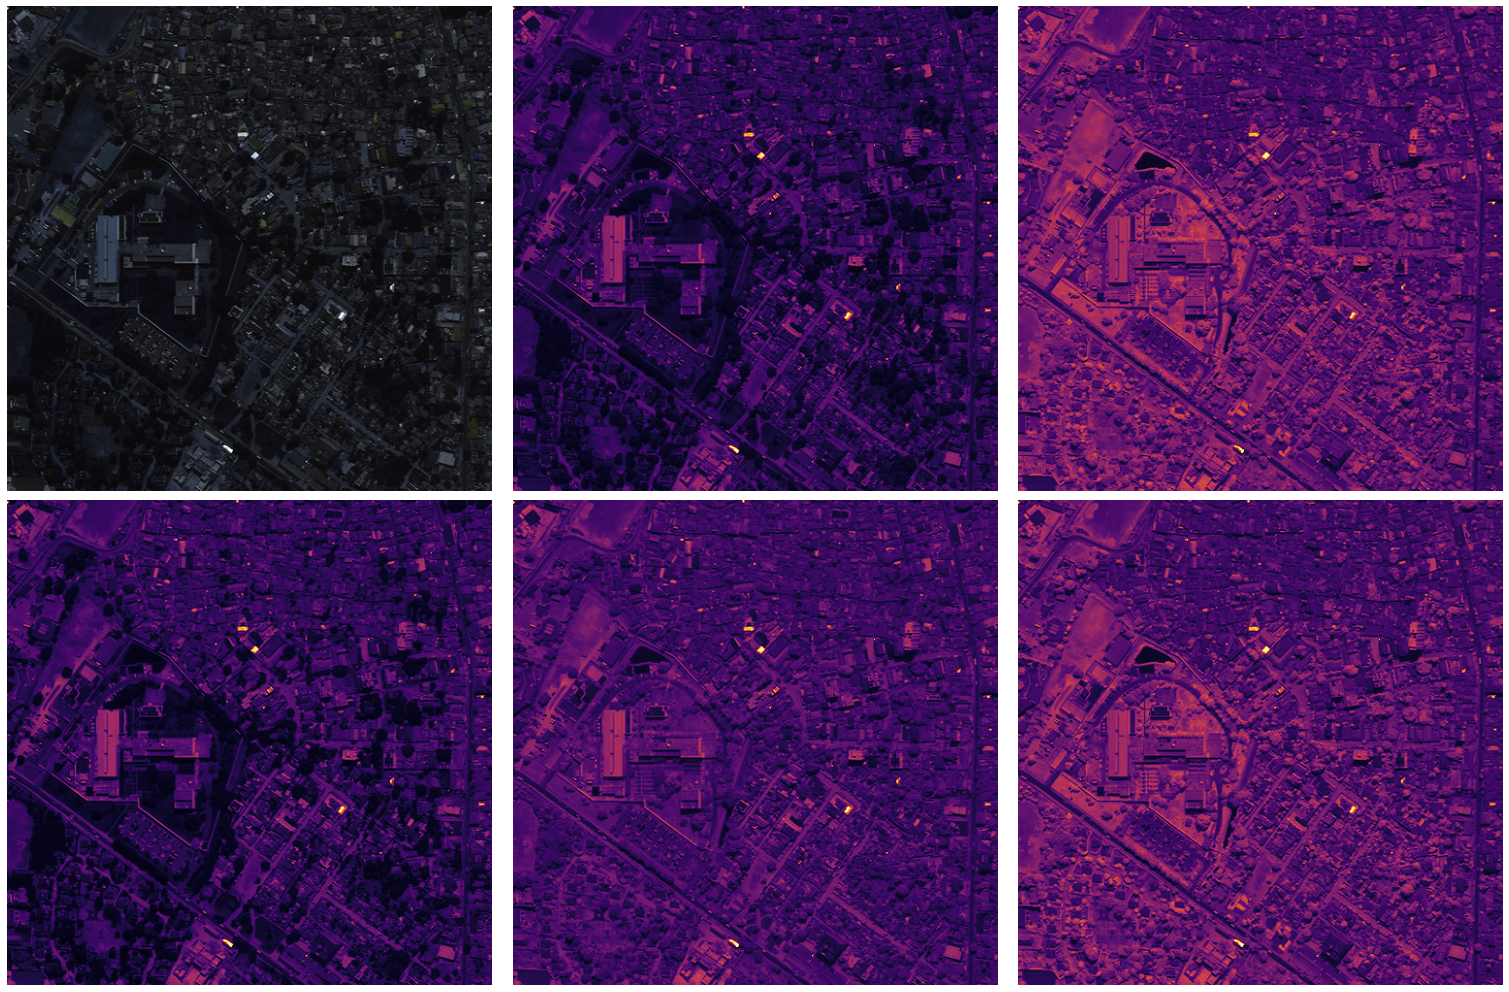

In [ ]:
X, Y = 1545, 4530 # patch origin
H1, W1 = 500, 500
image = np.array(image)
color_img = np.dstack(image[:3, X:H1+X, Y:W1+Y])
f, axarr = plt.subplots(2,3,figsize=(27, 18))

axarr[0,0].imshow(color_img)
axarr[0,1].imshow(image[3][X:H1+X, Y:W1+Y], cmap='inferno')
axarr[1,0].imshow(image[4][X:H1+X, Y:W1+Y], cmap='inferno')
axarr[1,1].imshow(image[5][X:H1+X, Y:W1+Y], cmap='inferno')
axarr[1,2].imshow(image[6][X:H1+X, Y:W1+Y], cmap='inferno')
axarr[0,2].imshow(image[7][X:H1+X, Y:W1+Y], cmap='inferno')

for i in range(3):
    for j in range(2):
        axarr[j, i].axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)
